**Pose Esimation: Model Hub**

- download the model from the Model Hub
- detect pose (17 main landmarks)
- display the image with landmarks and edges

In [1]:
 @file:Repository("*mavenLocal")

In [2]:
import org.jetbrains.kotlinx.dl.api.summary.printSummary
import org.jetbrains.kotlinx.dl.impl.preprocessing.image.ImageConverter
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModelHub
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModels
import org.jetbrains.kotlinx.dl.visualization.swing.createDetectedObjectsPanel
import org.jetbrains.kotlinx.dl.visualization.swing.showFrame
import java.io.File
import javax.imageio.ImageIO
import second.PROJECT_ROOT

In [3]:
val PATH_TO_IMAGE = "${PROJECT_ROOT}src/main/resources/datasets/poses/4.jpg"

val PATH_TO_PRETRAINED_MODELS = "../../../cache/pretrainedModels"

**Download the model from the model hub**

In [4]:
val modelHub = ONNXModelHub(cacheDirectory = File(PATH_TO_PRETRAINED_MODELS))
val poseDetectionModel = ONNXModels.PoseDetection.MoveNetSinglePoseLighting.pretrainedModel(modelHub)

In [5]:
poseDetectionModel.printSummary()

MoveNetSinglePoseLighting model summary
Model type: ONNX
_____________________________________________________
Inputs   Type                                        
input    Tensor {dtype=INT32, shape [1, 192, 192, 3]}
_____________________________________________________
Outputs  Type                                        
output_0 Tensor {dtype=FLOAT, shape [1, 1, 17, 3]}   
_____________________________________________________


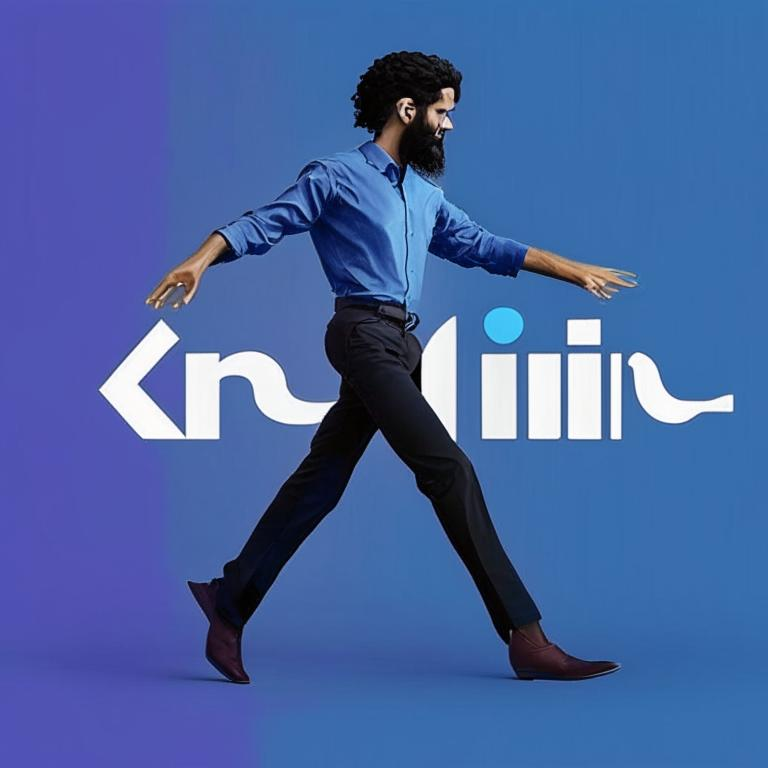

In [6]:
val image = ImageIO.read(File(PATH_TO_IMAGE))

DISPLAY(image)

**Detect pose: landmarks und edges**

In [7]:
val detectedPose = poseDetectionModel.detectPose(image)

poseDetectionModel.close()

**What objects were found?**

In [8]:
detectedPose.landmarks.forEach {
    println("Found ${it.label} with probability ${it.probability}")
}

detectedPose.edges.forEach {
    println("The ${it.label} starts at ${it.start.label} and ends with ${it.end.label}")
}

Found nose with probability 0.61995625
Found left_eye with probability 0.5935949
Found right_eye with probability 0.7301085
Found left_ear with probability 0.6486932
Found right_ear with probability 0.82385564
Found left_shoulder with probability 0.81900525
Found right_shoulder with probability 0.6935551
Found left_elbow with probability 0.5709717
Found right_elbow with probability 0.65315557
Found left_wrist with probability 0.6096981
Found right_wrist with probability 0.6096869
Found left_hip with probability 0.840043
Found right_hip with probability 0.8227173
Found left_knee with probability 0.7295585
Found right_knee with probability 0.82629
Found left_ankle with probability 0.7673803
Found right_ankle with probability 0.8341169
The nose_left_eye starts at nose and ends with left_eye
The nose_right_eye starts at nose and ends with right_eye
The left_eye_left_ear starts at left_eye and ends with left_ear
The right_eye_right_ear starts at right_eye and ends with right_ear
The nose_le

**Let's draw the edges and landmarks**

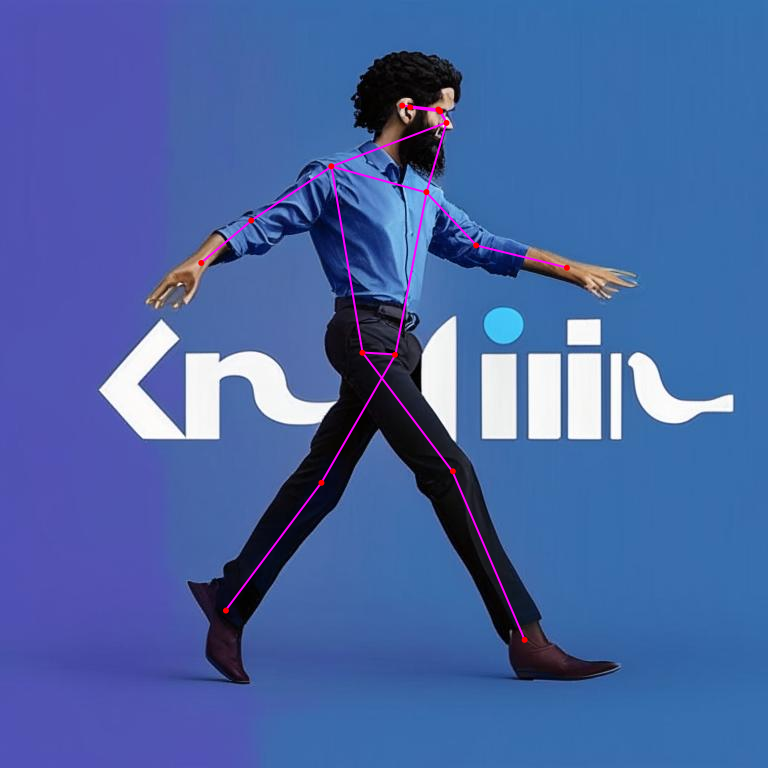

In [9]:
import second.drawDetectedPose

val bufferedImageWithPoses = drawDetectedPose(image, detectedPose)
DISPLAY(bufferedImageWithPoses)